**TIME SERIES FORECASTING OF OIL PRICES**

In [ ]:
pip install fbprophet

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:

import numpy as np 
import pandas as pd 
from fbprophet import Prophet 
import matplotlib.pyplot as plt



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/brent-oil-prices/BrentOilPrices.csv


In [ ]:
filepath='../input/brent-oil-prices/BrentOilPrices.csv'
brent=pd.read_csv(filepath)

In [ ]:
brent.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [ ]:
# pas de valeurs nulles
brent.isnull().any()

Date     False
Price    False
dtype: bool

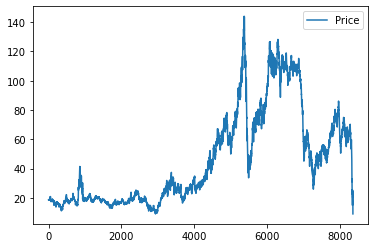

In [ ]:
brent.plot()


In [ ]:
# The columns to be named ds and y are important in Prophet.

brent.columns =['ds','y']
brent.head()

,ds,y
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [ ]:
# Converting the String Based Dataset to a datetime format
brent['ds']=pd.to_datetime(brent['ds'])

In [ ]:
brent.head()

,ds,y
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [ ]:
# Modele
model=Prophet()
model.fit(brent)

In [ ]:


model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [ ]:
# prediction dans un futur de 580 jours
future_pred=model.make_future_dataframe(periods=580)

In [ ]:
brent.tail()

,ds,y
8355,2020-04-15,19.80
8356,2020-04-16,18.69
8357,2020-04-17,19.75
8358,2020-04-20,17.36
8359,2020-04-21,9.12


In [ ]:
# so the dates for 1 year more is added
future_pred.tail()

,ds
8935,2021-11-18
8936,2021-11-19
8937,2021-11-20
8938,2021-11-21
8939,2021-11-22


In [ ]:
prediction = model.predict(future_pred)

In [ ]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
8935,2021-11-18,36.216149,17.689843,52.261755,27.795212,44.886225,-1.333485,-1.333485,-1.333485,-0.217625,-0.217625,-0.217625,-1.115860,-1.115860,-1.115860,0.0,0.0,0.0,34.882664
8936,2021-11-19,36.198735,16.665284,52.834296,27.741800,44.884855,-1.447730,-1.447730,-1.447730,-0.304014,-0.304014,-0.304014,-1.143717,-1.143717,-1.143717,0.0,0.0,0.0,34.751005
8937,2021-11-20,36.181321,18.552477,53.423873,27.692233,44.883484,-0.400028,-0.400028,-0.400028,0.771495,0.771495,0.771495,-1.171523,-1.171523,-1.171523,0.0,0.0,0.0,35.781293
8938,2021-11-21,36.163907,19.453588,52.590659,27.642666,44.882114,-0.428232,-0.428232,-0.428232,0.771495,0.771495,0.771495,-1.199727,-1.199727,-1.199727,0.0,0.0,0.0,35.735675
8939,2021-11-22,36.146494,16.550788,50.950006,27.593099,44.880743,-1.488850,-1.488850,-1.488850,-0.260096,-0.260096,-0.260096,-1.228754,-1.228754,-1.228754,0.0,0.0,0.0,34.657644


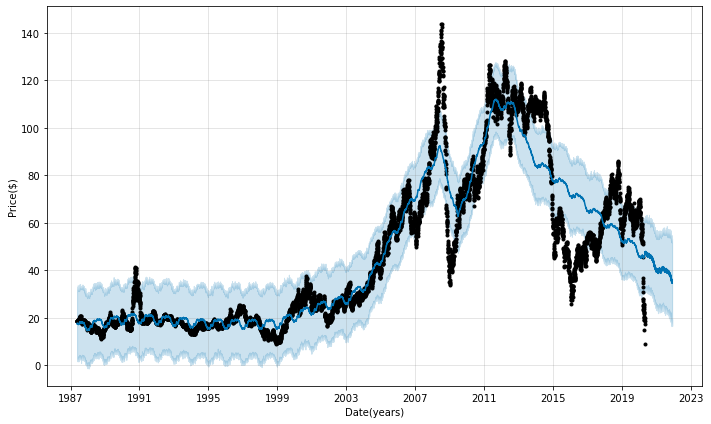

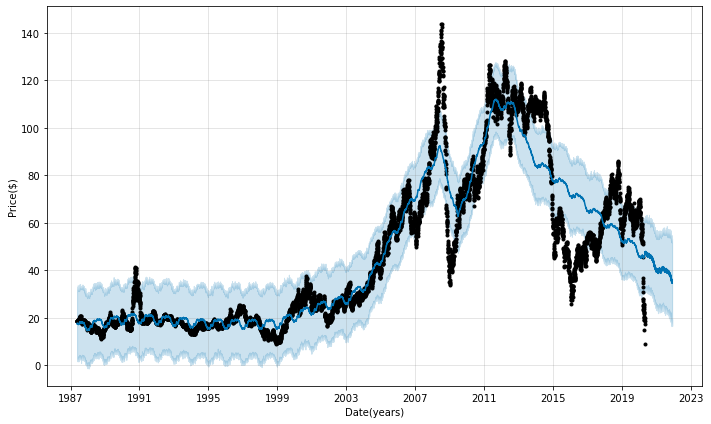

In [ ]:
model.plot(prediction,xlabel='Date(years)',ylabel='Price($)')

# The part after the 2021 shows the decline in the oil prices.